In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import time
import re

In [2]:
name=[]
year=[]
duration=[]
certified = []
ratings = []
metascore = []
votesngross=[]
director = []
genre = []

In [3]:
director

[]

In [4]:
for i in range(20):
    
    start_time = time.time()
    
    url = f"https://www.imdb.com/search/title/?groups=top_1000&start={(50*i + 1)}&ref_=adv_nxt"
    htmlstring = requests.get(url)
    htmlcontent = htmlstring.text
    soup = BeautifulSoup(htmlcontent)
    
    for x in soup.find_all("div",attrs={"class":"lister-item-content"}):
        
        # for extracting name, year, duration, certified, ratings, metascore, votesngross, genre
        
        rawname = x.find("h3",attrs={"class":"lister-item-header"})
        rawyear = x.find("span",attrs={"class":"lister-item-year text-muted unbold"})
        rawduration = x.find("span",attrs={"class":"runtime"})
        rawcertified = x.find("span",attrs={"class":"certificate"})
        rawratings = x.find("div",attrs={"class":"inline-block ratings-imdb-rating"})
        rawmetascore = x.find("div",attrs={"class":"inline-block ratings-metascore"})
        rawvotesngross = x.find("p",attrs={"class":"sort-num_votes-visible"})
        rawgenre = x.find("span",attrs = {"class":"genre"})
        
        if rawname is None:
            name.append(np.NaN)
        else:
            name.append(rawname.text)
            
        if rawyear is None:
            year.append(np.NaN)
        else:
            year.append(rawyear.text)
            
        if rawduration is None:
            duration.append(np.NaN)
        else:
            duration.append(rawduration.text)
            
        if rawcertified is None:
            certified.append(np.NaN)
        else:
            certified.append(rawcertified.text)
            
        if rawratings is None:
            ratings.append(np.NaN)
        else:
            ratings.append(rawratings.text)
            
        if rawmetascore is None:
            metascore.append(np.NaN)
        else:
            metascore.append(rawmetascore.text)
            
        if rawvotesngross is None:
            votesngross.append(np.NaN)
        else:
            votesngross.append(rawvotesngross.text)
            
        if rawgenre is None:
            genre.append(np.NaN)
        else:
            genre.append(rawgenre.text)
            
    # for extractig Director and Cast
    
    i = 0
    d = -2
    for x in soup.find_all('p'):
        if (i == d+4):
            director.append((x.text).replace("\n",""))
            d+=4
        i+=1  
    
    end_time = time.time()
    print(f"scraped status code = {htmlstring.status_code} and scraping time = {end_time - start_time}")
    time.sleep(1)

scraped status code = 200 and scraping time = 2.0667712688446045
scraped status code = 200 and scraping time = 1.8960497379302979
scraped status code = 200 and scraping time = 2.717008352279663
scraped status code = 200 and scraping time = 3.088813304901123
scraped status code = 200 and scraping time = 2.6455225944519043
scraped status code = 200 and scraping time = 1.834500789642334
scraped status code = 200 and scraping time = 1.8257133960723877
scraped status code = 200 and scraping time = 2.098876953125
scraped status code = 200 and scraping time = 2.010952949523926
scraped status code = 200 and scraping time = 5.270381689071655
scraped status code = 200 and scraping time = 1.8679401874542236
scraped status code = 200 and scraping time = 2.1328301429748535
scraped status code = 200 and scraping time = 5.463109493255615
scraped status code = 200 and scraping time = 2.7225241661071777
scraped status code = 200 and scraping time = 3.421112537384033
scraped status code = 200 and scrapi

### first layer of cleaning (brief manner)

In [5]:
new_name=[]
new_ratings = []
new_metascore = []
new_votesngross = []
new_genre = []

print("==============")
print("values from the scraped data : ")
print(name[46])                                           # before values
print(ratings[46])
print(metascore[46])
print(votesngross[46])
print(genre[46])


[new_name.append(i.replace("\n"," ")) for i in name]
[new_ratings.append(i.replace("\n","")) for i in ratings]
[new_metascore.append(str(i).replace("\n","")) for i in metascore]
[new_votesngross.append(i.replace("\n","")) for i in votesngross]
[new_genre.append(i.replace("\n","")) for i in genre]


print("\n\n==============")
print("values after 1st step of cleaning : ")
print(new_name[46])                                          # after values
print(new_ratings[46])
print(new_metascore[46])
print(new_votesngross[46])
print(new_genre[46])

values from the scraped data : 

47.
Scarface
(1983)



8.3


65        
        Metascore
            

Votes:
762,712
| Gross:
$45.60M


Crime, Drama            


values after 1st step of cleaning : 
 47. Scarface (1983) 
8.3
65                Metascore            
Votes:762,712| Gross:$45.60M
Crime, Drama            


### converting the data to csv

In [6]:
dct = {
    "Name" : new_name,
    "Ratings" : new_ratings,
    "Year" : year,
    "Duration" : duration,
    "Certified" : certified,
    "Metascore" : new_metascore,
    "Votesngross" : new_votesngross,
    "Crew":director,
    "Genrecombo" : new_genre
} 

rawdata = pd.DataFrame(dct)
rawdata.to_csv("scraped_data.csv",index=False)

In [7]:
data = pd.read_csv("scraped_data.csv")

In [8]:
data.head()

Name  Ratings        Year Duration  \
0                     1. The Father (I) (2020)       8.3  (I) (2020)   97 min   
1           2. The Shawshank Redemption (1994)       9.3      (1994)  142 min   
2   3. Once Upon a Time... in Hollywood (2019)       7.6      (2019)  161 min   
3                   4. The Big Lebowski (1998)       8.1      (1998)  117 min   
4                              5. Joker (2019)       8.4      (2019)  122 min   

  Certified                                Metascore  \
0        UA  88                Metascore               
1         A  80                Metascore               
2         A  83                Metascore               
3        UA  71                Metascore               
4         A  59                Metascore               

                       Votesngross  \
0                     Votes:72,241   
1   Votes:2,409,586| Gross:$28.34M   
2    Votes:591,159| Gross:$142.50M   
3     Votes:749,729| Gross:$17.50M   
4  Votes:1,013,605| Gross:$335.45M   

                                                Crew  \
0      Director:Florian Zeller|     Stars:Anthony...   
1      Director:Frank Darabont|     Stars:Tim Rob...   
2      Director:Quentin Tarantino|     Stars:Leon...   
3      Directors:Joel Coen, Ethan Coen|     Stars...   
4      Director:Todd Phillips|     Stars:Joaquin ...   

                           Genrecombo  
0                   Drama              
1                   Drama              
2           Comedy, Drama              
3    Comedy, Crime, Sport              
4  Crime, Drama, Thriller

### Data Cleaning  (feature wise cleaning)

#### cleaning Name

In [9]:
print(data["Name"][45])               # before cleaning

print(data['Name'][21])

 46. Mystic River (2003) 
 22. Forrest Gump (1994) 


In [10]:
# note run only once 
data['Name']  = data['Name'].apply(lambda x: " ".join(x.split(" ")[2:-2])) 

In [11]:
print(data["Name"][45])              # after cleaning

print(data['Name'][21])

Mystic River
Forrest Gump


In [12]:
len(data['Name'].unique())                   # 600 unique n0n null ids i.e., movie names

998

In [13]:
data.head(2)

Name  Ratings        Year Duration Certified  \
0            The Father (I)      8.3  (I) (2020)   97 min        UA   
1  The Shawshank Redemption      9.3      (1994)  142 min         A   

                                 Metascore                     Votesngross  \
0  88                Metascore                                Votes:72,241   
1  80                Metascore              Votes:2,409,586| Gross:$28.34M   

                                                Crew         Genrecombo  
0      Director:Florian Zeller|     Stars:Anthony...  Drama              
1      Director:Frank Darabont|     Stars:Tim Rob...  Drama

#### cleaning Ratings

In [14]:
data['Ratings'].dtype

dtype('float64')

In [15]:
data['Ratings'].isna().sum()

0

#### cleaning Year

In [16]:
regx= r"\d{4}"
pregx = re.compile(regx)
data["Year"] = data["Year"].apply(lambda x : pregx.search(x).group())

In [17]:
data.sample(5)

Name  Ratings  Year Duration Certified  \
378         Ordinary People      7.7  1980  124 min         U   
53       Mad Max: Fury Road      8.1  2015  120 min        UA   
720         La règle du jeu      8.0  1939  110 min       NaN   
382                   Glory      7.8  1989  122 min       NaN   
757  Breakfast at Tiffany's      7.6  1961  115 min         A   

                                   Metascore                    Votesngross  \
378  86                Metascore                Votes:48,293| Gross:$54.80M   
53   90                Metascore              Votes:907,683| Gross:$154.06M   
720                                      NaN                   Votes:27,231   
382  78                Metascore               Votes:126,029| Gross:$26.83M   
757  76                Metascore                              Votes:170,169   

                                                  Crew  \
378      Director:Robert Redford|     Stars:Donald ...   
53       Director:George Miller|     Stars:Tom Hard...   
720      Director:Jean Renoir|     Stars:Marcel Dal...   
382      Director:Edward Zwick|     Stars:Matthew B...   
757      Director:Blake Edwards|     Stars:Audrey H...   

                                Genrecombo  
378                      Drama              
53   Action, Adventure, Sci-Fi              
720              Comedy, Drama              
382  Biography, Drama, History              
757     Comedy, Drama, Romance

In [18]:
data['Year'].isnull().sum()

0

###### type conversion

In [19]:
data['Year'].dtype                                      # before

dtype('O')

In [20]:
import datetime as dt                                                               # type conversion 
data['Year'] = data['Year'].apply(lambda x: (dt.datetime.strptime(x,'%Y')).year)    # datetimetype.year ===> int64 type

In [21]:
data['Year'].dtype                                       # after

dtype('int64')

#### cleaning Duration

In [22]:
regx= r"\d+"
pregx = re.compile(regx)
data["Duration"] = data["Duration"].apply(lambda x : pregx.search(x).group())

In [23]:
data.sample(5)

Name  Ratings  Year Duration Certified  \
802              Zelig      7.7  1983       79       NaN   
826     Night on Earth      7.7  1991      129         R   
144  Kill Bill: Vol. 1      8.1  2003      111         R   
258    The Fighter (I)      7.8  2010      116        UA   
325          The Birds      7.7  1963      119         A   

                                   Metascore                     Votesngross  \
802                                      NaN     Votes:40,500| Gross:$11.80M   
826  68                Metascore                  Votes:56,724| Gross:$2.02M   
144  69                Metascore              Votes:1,023,080| Gross:$70.10M   
258  79                Metascore                Votes:346,809| Gross:$93.62M   
325  90                Metascore                Votes:175,269| Gross:$11.40M   

                                                  Crew  \
802      Director:Woody Allen|     Stars:Woody Alle...   
826      Director:Jim Jarmusch|     Stars:Winona Ry...   
144      Director:Quentin Tarantino|     Stars:Uma ...   
258      Director:David O. Russell|     Stars:Mark ...   
325      Director:Alfred Hitchcock|     Stars:Rod T...   

                              Genrecombo  
802                   Comedy              
826            Comedy, Drama              
144     Action, Crime, Drama              
258  Biography, Drama, Sport              
325   Drama, Horror, Mystery

In [24]:
data['Duration'].isnull().sum()

0

In [25]:
data['Duration'].dtype

dtype('O')

###### type conversion

In [26]:
# type conversion of duration into int

data["Duration(min)"] = data['Duration'].astype(str).astype(int)

In [27]:
data.drop(["Duration"],axis=1,inplace = True)

#### cleaning Certified

In [28]:
cer = list(data["Certified"].value_counts().index)
con = cer[4:]
data["Certified"] = data["Certified"].apply(lambda x : "PG" if x in con else x)      

In [29]:
data["Certified"].value_counts()

U     271
A     213
UA    189
R      87
PG     80
Name: Certified, dtype: int64

###### cleaning Metascore and storing into LikePrediction(%)

> observations from the metascore data: 

In [30]:
data["Metascore"].dtype

dtype('O')

In [31]:
print(data["Metascore"][0])
print(type(data["Metascore"][0]))
print("="*30)
print(data["Metascore"][221])
print(type(data["Metascore"][221]))

88                Metascore            
<class 'str'>
61                Metascore            
<class 'str'>


In [32]:
regx = r"[0-9]+"
pregx = re.compile(regx)
data["LikePrediction(%)"] = data["Metascore"].apply(lambda x : np.NaN if type(x) == float else float(re.sub(r"[^0-9]", "",str(x))))

In [33]:
data['Metascore'].isna().sum()

161

In [34]:
data.drop(["Metascore"],axis=1,inplace=True)
# data.shape

In [35]:
data.sample(5)

Name  Ratings  Year Certified                   Votesngross  \
741          Stalag 17      8.0  1953       NaN                  Votes:51,674   
986             Gifted      7.6  2017        PG  Votes:104,471| Gross:$24.80M   
912  Pride & Prejudice      7.8  2005        PG  Votes:267,435| Gross:$38.41M   
803            Amadeus      8.3  1984         R  Votes:376,243| Gross:$51.97M   
617    Special Chabbis      8.0  2013        UA    Votes:52,414| Gross:$1.08M   

                                                  Crew  \
741      Director:Billy Wilder|     Stars:William H...   
986      Director:Marc Webb|     Stars:Chris Evans,...   
912      Director:Joe Wright|     Stars:Keira Knigh...   
803      Director:Milos Forman|     Stars:F. Murray...   
617      Director:Neeraj Pandey|     Stars:Akshay K...   

                                Genrecombo  Duration(min)  LikePrediction(%)  
741         Comedy, Drama, War                        120               84.0  
986                      Drama                        101               60.0  
912             Drama, Romance                        129               82.0  
803  Biography, Drama, History                        160               88.0  
617     Crime, Drama, Thriller                        144                NaN

In [36]:
data['LikePrediction(%)'].isna().sum()

161

In [37]:
data['LikePrediction(%)'].dtype

dtype('float64')

###### dividing Votesngross into Votes and Gross seperately and then cleaning them 

> dividing into Votes

In [38]:
# print(new_votesngross[313].split("|")[0])           # o/p : Votes:672,312
# print(new_votesngross[313].split("|")[1])           # o/p : Gross:$132.09M      if not exists then error throws 

data["Votes"] = data["Votesngross"].apply(lambda x: x.split("|")[0])


# print(new_votesngross[156])            # o/p : Votes:771,860| Gross:$6.21M

regx=r"\d+"
pregx = re.compile(regx)
data["Votes"] = data["Votes"].apply(lambda x: pregx.search(x.replace(",","")).group())          # removing ',' also 
# print(data['Votes'][156])              # o/p : 771860


In [39]:
data.sample(3)

Name  Ratings  Year Certified  \
659                                  Andaz Apna Apna      8.1  1994         U   
882                                     Finding Nemo      8.1  2003         U   
965  Birdman or (The Unexpected Virtue of Ignorance)      7.7  2014         A   

                       Votesngross  \
659                   Votes:50,859   
882  Votes:968,463| Gross:$380.84M   
965   Votes:592,280| Gross:$42.34M   

                                                  Crew  \
659      Director:Rajkumar Santoshi|     Stars:Aami...   
882      Directors:Andrew Stanton, Lee Unkrich|    ...   
965      Director:Alejandro G. Iñárritu|     Stars:...   

                                   Genrecombo  Duration(min)  \
659       Action, Comedy, Romance                        160   
882  Animation, Adventure, Comedy                        100   
965                 Comedy, Drama                        119   

     LikePrediction(%)   Votes  
659                NaN   50859  
882               90.0  968463  
965               87.0  592280

###### type conversion

In [40]:
data['Votes'].dtype

dtype('O')

In [41]:
data['Votes'] = data['Votes'].astype(str).astype(int)

In [42]:
data['Votes'].isna().sum()

0

> dividing into Gross

In [43]:
# print(new_votesngross[4])         # o/p : Votes:69,447  and no Gross so it throws none type after search() so fill it with NaN

regx = r"[0-9.]+"
pregx = re.compile(regx)
data["Gross(millionsUS$)"] = data["Votesngross"].apply(lambda x: np.NaN if len(x.split("|")) == 1 else pregx.search(x.split("|")[1]).group())

In [44]:
data.sample(3)

Name  Ratings  Year Certified  \
810                Stand by Me      8.1  1986         U   
208  The Count of Monte Cristo      7.7  2002        PG   
879             Das Experiment      7.7  2001         R   

                      Votesngross  \
810  Votes:371,832| Gross:$52.29M   
208  Votes:131,222| Gross:$54.23M   
879    Votes:91,635| Gross:$0.14M   

                                                  Crew  \
810      Director:Rob Reiner|     Stars:Wil Wheaton...   
208      Director:Kevin Reynolds|     Stars:Jim Cav...   
879      Director:Oliver Hirschbiegel|     Stars:Mo...   

                               Genrecombo  Duration(min)  LikePrediction(%)  \
810          Adventure, Drama                         89               75.0   
208  Action, Adventure, Drama                        131               61.0   
879           Drama, Thriller                        120               60.0   

      Votes Gross(millionsUS$)  
810  371832              52.29  
208  131222              54.23  
879   91635               0.14

In [45]:
data.drop(["Votesngross"],axis=1,inplace=True)

In [46]:
data['Gross(millionsUS$)'].isna().sum()

173

In [47]:
data.sample(3)

Name  Ratings  Year Certified  \
639  Dilwale Dulhania Le Jayenge      8.1  1995         U   
147               About Time (I)      7.8  2013        PG   
365         The Bourne Supremacy      7.7  2004         A   

                                                  Crew  \
639      Director:Aditya Chopra|     Stars:Shah Ruk...   
147      Director:Richard Curtis|     Stars:Domhnal...   
365      Director:Paul Greengrass|     Stars:Matt D...   

                                Genrecombo  Duration(min)  LikePrediction(%)  \
639             Drama, Romance                        189                NaN   
147     Comedy, Drama, Fantasy                        123               55.0   
365  Action, Mystery, Thriller                        108               73.0   

      Votes Gross(millionsUS$)  
639   65209                NaN  
147  315134              15.32  
365  441334             176.24

###### type conversion

In [48]:
data['Gross(millionsUS$)'] = data['Gross(millionsUS$)'].astype(float)

In [49]:
data['Gross(millionsUS$)'].dtype

dtype('float64')

###### dividing crew into tho Director

In [50]:
# data["crew"] = data["crew"].apply(lambda x: x.split("|")[0])
def cleandirector(x):
    directorsheaderlist = x.split("|")[0]
    directorsnamelist = directorsheaderlist.split(":")[1:]
    return (",".join(directorsnamelist))

data["Directors"] = data['Crew'].apply(lambda x : cleandirector(x))

In [51]:
data.sample(3)

Name  Ratings  Year Certified  \
786  Monty Python and the Holy Grail      8.2  1975         U   
8                       Gisaengchung      8.6  2019         A   
748                  Smultronstället      8.2  1957         U   

                                                  Crew  \
786      Directors:Terry Gilliam, Terry Jones|     ...   
8        Director:Bong Joon Ho|     Stars:Kang-ho S...   
748      Director:Ingmar Bergman|     Stars:Victor ...   

                                 Genrecombo  Duration(min)  LikePrediction(%)  \
786  Adventure, Comedy, Fantasy                         91               91.0   
8       Comedy, Drama, Thriller                        132               96.0   
748              Drama, Romance                         91               88.0   

      Votes  Gross(millionsUS$)                   Directors  
786  509152                1.23  Terry Gilliam, Terry Jones  
8    620854               53.37                Bong Joon Ho  
748   99209                 NaN              Ingmar Bergman

In [52]:
lst = data["Directors"][3].split(",")
len(lst)
data["#directors"] = data["Directors"].apply(lambda x : len(x.split(",")))

In [53]:
data.sample(3)

Name  Ratings  Year Certified  \
721          Stagecoach      7.9  1939       NaN   
567       Victoria (II)      7.6  2015       NaN   
241  Young Frankenstein      8.0  1974         A   

                                                  Crew  \
721      Director:John Ford|     Stars:John Wayne, ...   
567      Director:Sebastian Schipper|     Stars:Lai...   
241      Director:Mel Brooks|     Stars:Gene Wilder...   

                                Genrecombo  Duration(min)  LikePrediction(%)  \
721  Adventure, Drama, Western                         96               93.0   
567      Crime, Drama, Romance                        138               77.0   
241                     Comedy                        106               80.0   

      Votes  Gross(millionsUS$)           Directors  #directors  
721   44982                 NaN           John Ford           1  
567   54790                 NaN  Sebastian Schipper           1  
241  146010                86.3          Mel Brooks           1

In [54]:
data["#directors"].value_counts()   # data has 1,2,3,4,5,6 no. of directors

1     922
2      64
3       8
6       2
4       2
12      1
5       1
Name: #directors, dtype: int64

###### converting data['#directors'] into the category type 

In [55]:
data['#directors']=data["#directors"].astype('object')
data['#directors'].dtype

dtype('O')

###### Adding Decade of release

In [56]:
data["DecadeofRelease"] = (data["Year"]//10) * 10        

###### Adding Number of Genres present in each  movie

In [57]:
data["#genres"] = data["Genrecombo"].apply(lambda x : len(x.split(", ")))

In [58]:
data["#genres"].value_counts()

3    643
2    248
1    109
Name: #genres, dtype: int64

###### converting data['#genre'] into the category type 

In [59]:
data['#genres']=data["#genres"].astype('object')
data['#genres'].dtype

dtype('O')

In [60]:
data.to_csv("after_cleaning.csv",index=False)              # cleaned data but with huge Crew and Genrecombo columns

In [61]:
data.head()

Name  Ratings  Year Certified  \
0                    The Father (I)      8.3  2020        UA   
1          The Shawshank Redemption      9.3  1994         A   
2  Once Upon a Time... in Hollywood      7.6  2019         A   
3                  The Big Lebowski      8.1  1998        UA   
4                             Joker      8.4  2019         A   

                                                Crew  \
0      Director:Florian Zeller|     Stars:Anthony...   
1      Director:Frank Darabont|     Stars:Tim Rob...   
2      Director:Quentin Tarantino|     Stars:Leon...   
3      Directors:Joel Coen, Ethan Coen|     Stars...   
4      Director:Todd Phillips|     Stars:Joaquin ...   

                           Genrecombo  Duration(min)  LikePrediction(%)  \
0                   Drama                         97               88.0   
1                   Drama                        142               80.0   
2           Comedy, Drama                        161               83.0   
3    Comedy, Crime, Sport                        117               71.0   
4  Crime, Drama, Thriller                        122               59.0   

     Votes  Gross(millionsUS$)              Directors #directors  \
0    72241                 NaN         Florian Zeller          1   
1  2409586               28.34         Frank Darabont          1   
2   591159              142.50      Quentin Tarantino          1   
3   749729               17.50  Joel Coen, Ethan Coen          2   
4  1013605              335.45          Todd Phillips          1   

   DecadeofRelease #genres  
0             2020       1  
1             1990       1  
2             2010       2  
3             1990       3  
4             2010       3

## creating a dictionary about stars to analyze in the later data analysis.

> creating a database for finding the name of the movie using actor names   (FUNCTION 1)

In [62]:
from collections import defaultdict

moviesearchbyactordct = defaultdict(list)

lstofcols = ['Name','Directors','Year','Genrecombo','Duration',
             'Ratings','Certified','Votes','LikePrediction(%)','Gross(millionsUS$)']


def createdictionary1(x):
    
    starsheaderlist = x.split("|")[1]
    starsnamestring = starsheaderlist.split(":")[1]
    seplist = starsnamestring.split(", ")
    
    for i in seplist:
        if moviesearchbyactordct.get(i,"No value") == "No value":
            moviesearchbyactordct[i].append(1)
            moviesearchbyactordct[i].append(data.loc[data['Crew'].str.find(i)!=-1,['Name','Genrecombo','Ratings','Certified','Gross(millionsUS$)']])
            continue
        moviesearchbyactordct[i][0]+=1
 

temp = data['Crew'].apply(lambda x : createdictionary1(x))

> creating a database for finding the stars of the movie using movie names (FUNCTION 2)

In [63]:
uvw = pd.DataFrame(data[['Name','Crew']])

In [64]:
def actorsearchbymovie(movie):
    p = data.loc[data['Name']==movie].index[0]
    print(f"{movie} movie actors :- ",(uvw.iloc[p,1].split("|")[1]).split(":")[1])


> creating a database for finding the genre of the movie using movie names (FUNCTION 3)

In [65]:
xyz = pd.DataFrame(data[['Name','Genrecombo']])

In [66]:
def genrebymovie(movie):
    p = data.loc[data['Name']==movie].index[0]
    print(f"{movie} movie genre :- ",xyz.iloc[p,1])

> creating a dictionary for storing the frequency of all kinds of genres (FUNCTION 4)

In [67]:
gendct = {}

def gencount(x):
    lst = x.split(", ")
    for i in lst:
        k = i.replace(" ","")
        if gendct.get(k,"No value") == "No value":
            gendct[k] = 1
            continue
        gendct[k] += 1

temp = data['Genrecombo'].apply(lambda x : gencount(x))


###### now we can remove the Crew and GenreCombo and still access the actors in a movie

In [68]:
data.drop(['Crew'],axis=1,inplace=True)
data.drop(['Genrecombo'],axis=1,inplace =True)

###### reordering the columns for better visualization at later anlysis 

In [69]:
column_names = ["Name", "Year","Directors", "#directors", "#genres","DecadeofRelease","Certified","Duration(min)","Ratings","Votes","LikePrediction(%)","Gross(millionsUS$)"]
data = data.reindex(columns=column_names)

In [70]:
data.to_csv("finaldataforEDA.csv",index=False)            # final data that we use for EDA

###### Proof that we can access even after removing data['Crew'] and data['Genrecombo'] permanently

In [71]:
actorsearchbymovie('Avengers: Endgame')
genrebymovie('Titanic')
moviesearchbyactordct['Adil Hussain'][1]              

Avengers: Endgame movie actors :-  Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth
Titanic movie genre :-  Drama, Romance            


Name                             Genrecombo  Ratings  \
319        Life of Pi  Adventure, Drama, Fantasy                  7.9   
960  English Vinglish      Comedy, Drama, Family                  7.8   

    Certified  Gross(millionsUS$)  
319         U              124.99  
960         U                1.67

# Now, the data has been cleaned and Data is to be analysed (EDA)

In [72]:
df = pd.read_csv("finaldataforEDA.csv")

In [73]:
df.dtypes

Name                   object
Year                    int64
Directors              object
#directors              int64
#genres                 int64
DecadeofRelease         int64
Certified              object
Duration(min)           int64
Ratings               float64
Votes                   int64
LikePrediction(%)     float64
Gross(millionsUS$)    float64
dtype: object

> ***Imputations*** to be done on the null values

In [74]:
# Before Imputations

for i in column_names:
    print(f"No. of Null Values in {i} : ",df[i].isna().sum())

No. of Null Values in Name :  0
No. of Null Values in Year :  0
No. of Null Values in Directors :  0
No. of Null Values in #directors :  0
No. of Null Values in #genres :  0
No. of Null Values in DecadeofRelease :  0
No. of Null Values in Certified :  160
No. of Null Values in Duration(min) :  0
No. of Null Values in Ratings :  0
No. of Null Values in Votes :  0
No. of Null Values in LikePrediction(%) :  161
No. of Null Values in Gross(millionsUS$) :  173


In [75]:
df['#directors']=df["#directors"].astype('object')
df['#directors'].dtype
df['#genres']=df["#genres"].astype('object')
df['#genres'].dtype

dtype('O')

### Imputations  (Handling of missing values) in the column Certified

In [76]:
df.pivot_table(index="Certified",values="Votes",aggfunc=["mean","median"])

mean  median
                   Votes   Votes
Certified                       
A          415086.154930  281076
PG         188375.150000  109319
R          188131.517241  108484
U          240984.062731  129802
UA         448292.063492  358282

In [77]:
mediana = 280837
medianpg = 109143
medianr = 108438
medianu = 129658
medianua = 357921

In [78]:
reqindicescert = list(df.loc[df["Certified"].isna()==True,["Certified","Votes"]].index)

def imputecert(reqindices,df):
    
    for i in reqindices:
        k= df.iloc[i,-3]
        lst = [abs(k-mediana) , abs(k-medianpg) ,  abs(k-medianr), abs(k-medianu), abs(k-medianua)] 
        if lst.index(min(lst)) == 0:
            df.iloc[i,6] = 'A'
        elif lst.index(min(lst)) == 1:
            df.iloc[i,6] = 'PG'
        elif lst.index(min(lst)) == 2:
            df.iloc[i,6] = 'R'
        elif lst.index(min(lst)) == 3:
            df.iloc[i,6] = 'U'
        else:
            df.iloc[i,6] = 'UA'

imputecert(reqindicescert,df)

In [79]:
df["Certified"].isna().sum()

0

###### Imputations  (Handling of missing values) in the column LikePrediction(%)

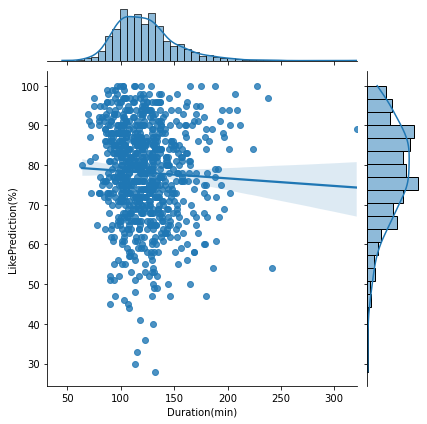

In [80]:
sns.jointplot(x = "Duration(min)",y="LikePrediction(%)", data=df,kind='reg')    # this gives us some good data

> ***Duration(min) >= 100*** and ***Duration(min) < 130*** has the mean of ***LikePrediction(%) = 77.7***


> ***Duration(min) < 100***  has the mean of ***LikePrediction(%) = 81.17***


> ***Duration(min) >= 130***  has the mean of ***LikePrediction(%) = 77.26***

In [81]:
c1 = df.loc[(df["Duration(min)"]>=100) & (df["Duration(min)"]<130),["Duration(min)","LikePrediction(%)"]]
c1mean = float("%.2f"%c1["LikePrediction(%)"].mean())
c1mean

77.65

In [82]:
c2 = df.loc[(df["Duration(min)"]<100),["Duration(min)","LikePrediction(%)"]]
c2mean = float("%.2f"%c2["LikePrediction(%)"].mean())
c2mean

81.18

In [83]:
c3 = df.loc[(df["Duration(min)"]>=130),["Duration(min)","LikePrediction(%)"]]
c3mean = float("%.2f"%c3["LikePrediction(%)"].mean())
c3mean

77.26

In [84]:
cols = pd.DataFrame(df[["Duration(min)","LikePrediction(%)"]])
reqindiceslk= list(cols.loc[df["LikePrediction(%)"].isna()==True,["Duration(min)","LikePrediction(%)"]].index)

def imputelk(reqindices,df):
    
    for i in reqindices:
        if 100 <= df.iloc[i,7] < 130:
            df.iloc[i,-2] = c1mean
        if df.iloc[i,7] < 100:
            df.iloc[i,-2] = c2mean
        if df.iloc[i,7] >=130:
            df.iloc[i,-2] = c3mean

imputelk(reqindiceslk,df)

In [85]:
df["LikePrediction(%)"].isna().sum()

0

###### Imputations  (Handling of missing values) in the column Gross(millionsUS$)

<AxesSubplot:xlabel='DecadeofRelease', ylabel='Gross(millionsUS$)'>

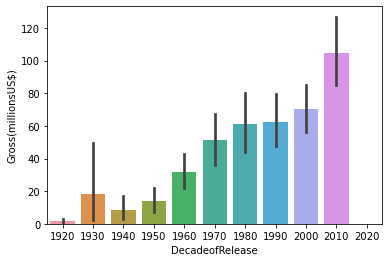

In [86]:
sns.barplot(x='DecadeofRelease',y='Gross(millionsUS$)',data=df)

# This also shows as years passes by the Gross(millionsUS$) rises

In [87]:
df.pivot_table(index='DecadeofRelease',values='Gross(millionsUS$)',aggfunc=['median'])


median
                Gross(millionsUS$)
DecadeofRelease                   
1920                         1.005
1930                         3.270
1940                         3.505
1950                         8.000
1960                        16.220
1970                        30.555
1980                        34.700
1990                        25.705
2000                        23.585
2010                        35.890

In [88]:
grossmedian = [1.005,3.270,3.505,8.000,16.220,30.555,34.700,25.010,23.585,35.475]

In [89]:
reqindicesgr = list(df.loc[df["Gross(millionsUS$)"].isna()== True , ["DecadeofRelease"]].index)

def imputegr(reqindicesgr):
    for i in reqindicesgr:
        if df.iloc[i,5] == 1920:
            df.iloc[i,11] = grossmedian[0]
        elif df.iloc[i,5] == 1930:
            df.iloc[i,11] = grossmedian[1]
        elif df.iloc[i,5] == 1940:
            df.iloc[i,11] = grossmedian[2]
        elif df.iloc[i,5] == 1950:
            df.iloc[i,11] = grossmedian[3]
        elif df.iloc[i,5] == 1960:
            df.iloc[i,11] = grossmedian[4]
        elif df.iloc[i,5] == 1970:
            df.iloc[i,11] = grossmedian[5]
        elif df.iloc[i,5] == 1980:
            df.iloc[i,11] = grossmedian[6]
        elif df.iloc[i,5] == 1990:
            df.iloc[i,11] = grossmedian[7]
        elif df.iloc[i,5] == 2000:
            df.iloc[i,11] = grossmedian[8]
        else:
            df.iloc[i,11] = grossmedian[9]
            
imputegr(reqindicesgr)            

In [90]:
df["Gross(millionsUS$)"].isna().sum()

0

In [91]:
# After Imputations

for i in column_names:
    print(f"No. of Null Values in {i} : ",df[i].isna().sum())

No. of Null Values in Name :  0
No. of Null Values in Year :  0
No. of Null Values in Directors :  0
No. of Null Values in #directors :  0
No. of Null Values in #genres :  0
No. of Null Values in DecadeofRelease :  0
No. of Null Values in Certified :  0
No. of Null Values in Duration(min) :  0
No. of Null Values in Ratings :  0
No. of Null Values in Votes :  0
No. of Null Values in LikePrediction(%) :  0
No. of Null Values in Gross(millionsUS$) :  0


## Univariate Analysis

### Univariate Analysis of the Categorical Features

> 1. ***The no. of directors for each movie are 1,2,3,4,5,6,12 based on 1000 movies*** The % of distribution are as shown

In [92]:
(df["#directors"].value_counts() / df.shape[0] )* 100              # percentages of each no. of directors in a movie

1     92.2
2      6.4
3      0.8
6      0.2
4      0.2
12     0.1
5      0.1
Name: #directors, dtype: float64

Text(0, 0.5, '#movies')

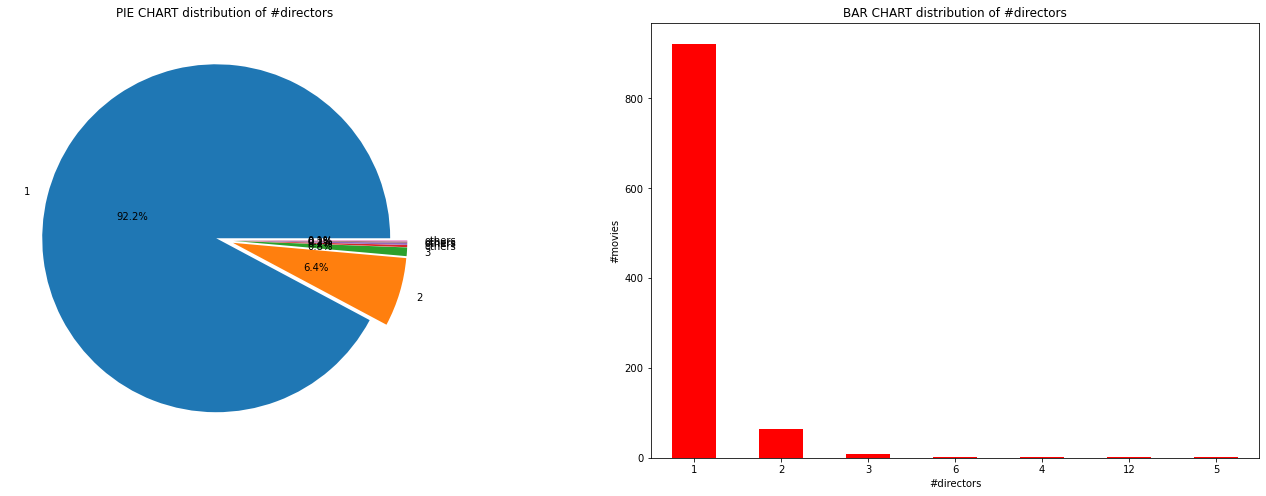

In [93]:
freq = df["#directors"].value_counts()
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.pie(freq,autopct="%.1f%%",labels=["1","2","3","others","others","others","others"],explode=[0.05]*7 ,pctdistance=.5)
plt.title("PIE CHART distribution of #directors")

plt.subplot(1,2,2)
freq.plot.bar(rot=0,color='red')
plt.title("BAR CHART distribution of #directors")
plt.xlabel("#directors")
plt.ylabel("#movies")

###### observation : Most of the movies(92.4%) movies are directed by a single director (#directors = 1)

---

> 2. ***The no. of genres for each movie are 1,2,3 based on 1000 movies*** The % of distribution are as shown

In [94]:
(df["#genres"].value_counts() / df.shape[0]) * 100

3    64.3
2    24.8
1    10.9
Name: #genres, dtype: float64

Text(0, 0.5, '#movies')

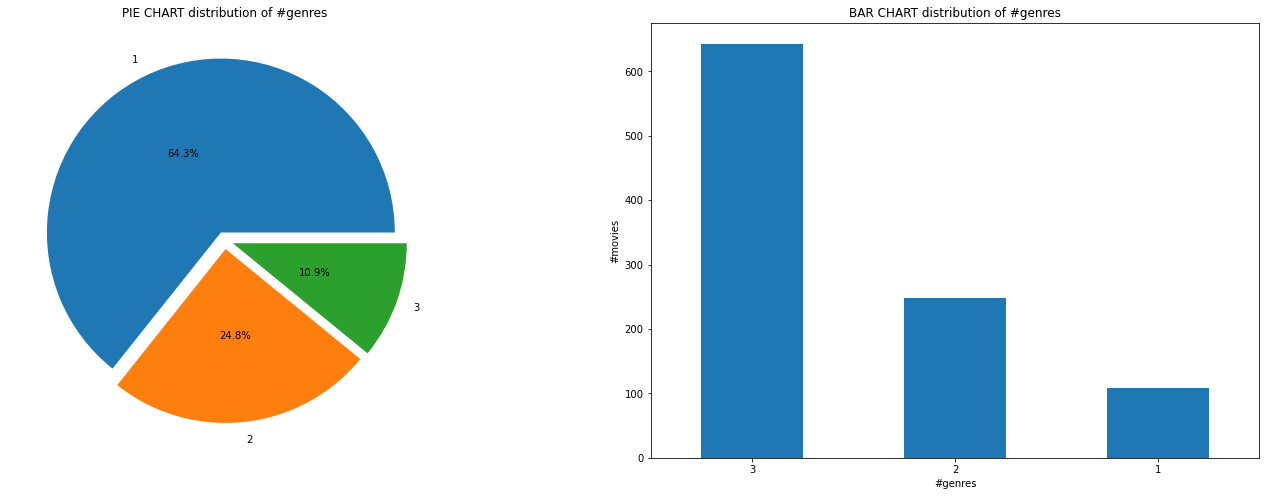

In [95]:
freq = df["#genres"].value_counts()
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.pie(freq,autopct="%.1f%%",labels=["1","2","3"],explode=[0.05]*3 ,pctdistance=.5)
plt.title("PIE CHART distribution of #genres")

plt.subplot(1,2,2)
freq.plot.bar(rot=0)
plt.title("BAR CHART distribution of #genres")
plt.xlabel("#genres")
plt.ylabel("#movies")

###### observation : Nearly (2/3)rd of the movies does contain 3 genres (#genres)

---

> 3. ***The no. of movies released in each decade from 1920s to 2020s based on 1000 movies*** The % of distribution are as shown

In [96]:
df['DecadeofRelease'].value_counts()         # no. of movies released per decade

2010    240
2000    236
1990    149
1980     88
1970     75
1960     72
1950     58
1940     36
1930     24
2020     11
1920     11
Name: DecadeofRelease, dtype: int64

Text(0, 0.5, '#movies')

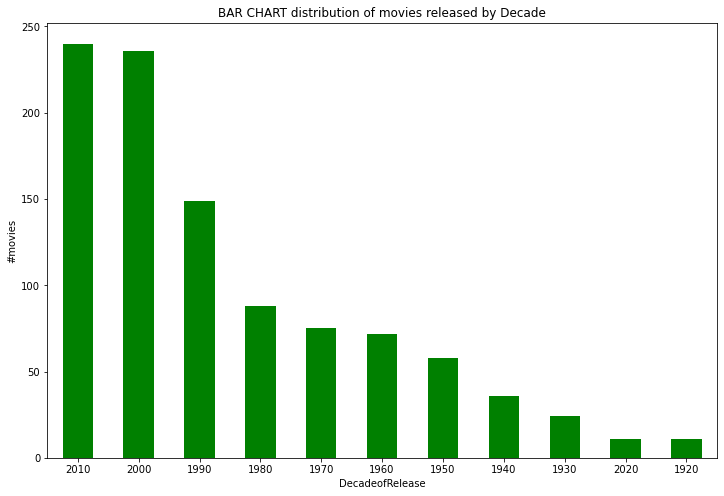

In [97]:
freq = df["DecadeofRelease"].value_counts()
plt.figure(figsize=(12,8))

freq.plot.bar(rot=0,color='green')
plt.title("BAR CHART distribution of movies released by Decade")
plt.xlabel("DecadeofRelease") 
plt.ylabel("#movies")

###### Observation: The 2020 is the present decade with one year passed and that to with covid so it depicts less number of movies

---

> 4. ***The no. of movies categorised by their certificate from 1920s to 2020s based on 1000 movies*** The % of distribution are as shown

In [98]:
(df["Certified"].value_counts() / 1000) *100

U     28.4
R     22.6
A     21.6
UA    19.0
PG     8.4
Name: Certified, dtype: float64

Text(0, 0.5, '#movies')

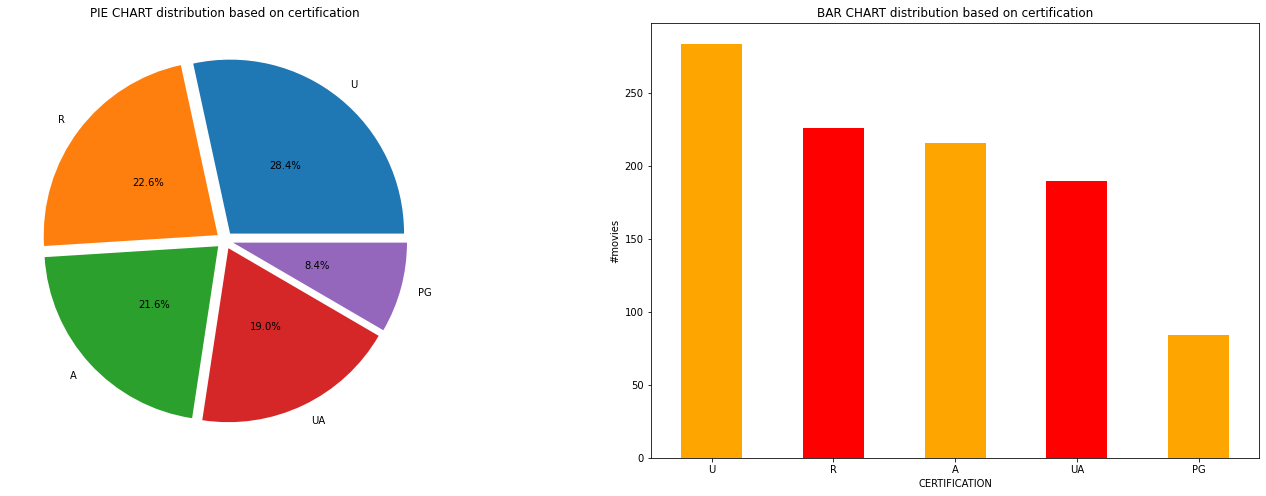

In [99]:
freq = df["Certified"].value_counts()
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.pie(freq,autopct="%.1f%%",labels=["U","R","A","UA","PG"],explode=[0.05]*5 ,pctdistance=.5)
plt.title("PIE CHART distribution based on certification")

plt.subplot(1,2,2)
freq.plot.bar(rot=0,color=['orange','red'])
plt.title("BAR CHART distribution based on certification")
plt.xlabel("CERTIFICATION")
plt.ylabel("#movies")

###### Observation: the movies released based on certification is greater in number in U > R > A > UA > PG 
---


## Analysis of the crew and the movies based on the database we earier created

###### finding the no, of movies acted and the data about movies  by searching about the name of the 'Actor'

In [100]:
moviesearchbyactordct['Emma Watson'][0]     # Gives the number of movies the actor is acted (ofcourse in the database)

7

In [101]:
moviesearchbyactordct['Emma Watson'][1]     # Gives the data of movies in which the actor is acted (ofcourse in the database)

Name  \
33   Harry Potter and the Deathly Hallows: Part 2   
35            Harry Potter and the Goblet of Fire   
51       Harry Potter and the Prisoner of Azkaban   
62                                   Little Women   
91         Harry Potter and the Half-Blood Prince   
178               The Perks of Being a Wallflower   
930  Harry Potter and the Deathly Hallows: Part 1   

                                 Genrecombo  Ratings Certified  \
33    Adventure, Drama, Fantasy                  8.1        UA   
35   Adventure, Family, Fantasy                  7.7        UA   
51   Adventure, Family, Fantasy                  7.9         U   
62               Drama, Romance                  7.8         U   
91    Action, Adventure, Family                  7.6        UA   
178              Drama, Romance                  7.9        UA   
930  Adventure, Family, Fantasy                  7.7         A   

     Gross(millionsUS$)  
33               381.01  
35               290.01  
51               249.36  
62               108.10  
91               301.96  
178               17.74  
930              295.98

###### finding the actors using movie names

In [102]:
actorsearchbymovie("Avatar")

Avatar movie actors :-  Sam Worthington, Zoe Saldana, Sigourney Weaver, Michelle Rodriguez


###### finding the genre of the movie using movie names

In [103]:
genrebymovie("Baby Driver")

Baby Driver movie genre :-  Action, Crime, Drama            


###### finding the no. of movies which are of a given type of genre

In [104]:
gendct['Horror']  

33

---
### Univariate Analysis of the Numerical Features

> 1. Duration(min) distribution univariate Analysis

In [105]:
px.histogram(df["Duration(min)"])

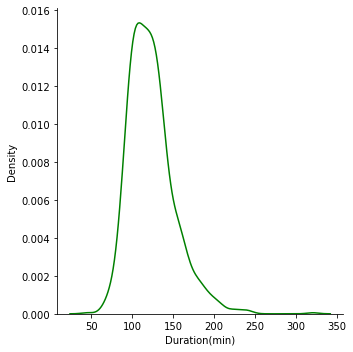

In [106]:
sns.displot(df["Duration(min)"],kind='kde',color='green')   # Gaussian Distribution (Bell shaped curve)

In [107]:
df["Duration(min)"].describe()    # this can be visualized using boxplot also shown in below cell
                                
# The data is normal as median and mean are very much linear

count    1000.000000
mean      123.238000
std        28.349198
min        45.000000
25%       103.000000
50%       119.000000
75%       137.000000
max       321.000000
Name: Duration(min), dtype: float64

In [108]:
px.box(df["Duration(min)"])     # only 15 outliers  less in number compared to 1000

# This gives the min, [25, 50(median), 75]percentiles , max  of the distribution along with the outliers

###### Observation : The Duration(min) of 500 films(50 percent of the data) is lies between 100 to 140 minutes

50% data (500 movies) Duration(min) are in the range of 103 min to 137 min with a median of 119

the mean of all the duration(min) of the movies = 123.19

So the data is almost normally distributed with only 15 outliers

---

> 2. Ratings distribution Univariate Analysis

In [109]:
px.histogram(df["Ratings"])

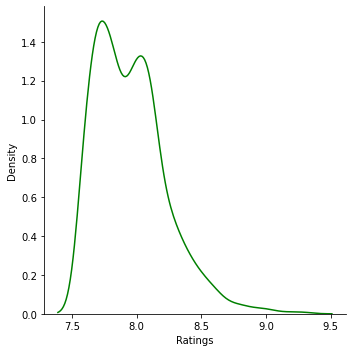

In [110]:
sns.displot(df["Ratings"],color='green',kind="kde")

###### observation: nearly 600/1000 are having ratings (7.7,7.8,8.1) which can be seen with two peaks in the above density function

In [111]:
df["Ratings"].describe()       # the data is however not skewed as mean is nearer to median but the data is also not normal

count    1000.000000
mean        7.955900
std         0.276915
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: Ratings, dtype: float64

In [112]:
px.box(df["Ratings"])     # only 15 outliers  less in number compared to 1000

# This gives the min, [25, 50(median), 75]percentiles , max  of the distribution along with the outliers

###### observation: This box plot shows that 7.9 is the median of the data  with 6 outliers out of 1000

50% data (500 movies) ratings are in the range of 7.7 to 8.1 

the mean of all the ratings = 7.95

So the data is normally distributed without any skewness 

---

> 3. Votes distribution Univariate Analysis

In [113]:
px.histogram(df["Votes"])   # more than 50% data has Votes in the range 0-150k

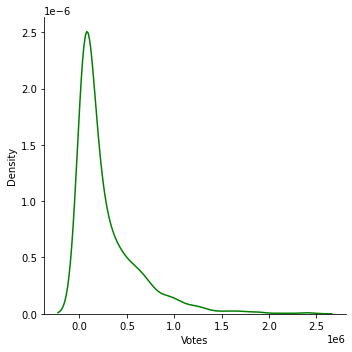

In [114]:
sns.displot(df["Votes"],color="green",kind='kde')  

# The distribution is right skewed (mean>median) so it has outliers present above the upper value

In [115]:
df["Votes"].describe()

count    1.000000e+03
mean     2.799674e+05
std      3.361655e+05
min      2.552100e+04
25%      5.590975e+04
50%      1.405555e+05
75%      3.825548e+05
max      2.409586e+06
Name: Votes, dtype: float64

In [116]:
# The distribution is right skewed (mean>median) so it has outliers present above the upper value
px.box(df["Votes"])

###### observation : The Distribution of the Votes is right skewed (+vely skewed) as mean > median

with 50% data (500 movies) having votes from 55.82k to 382.589k 

as the data is right skewed, there will be presence of outliers above the upper fence

---

> 4. LikePrediction(%) Univariate Analysis

In [117]:
px.histogram(df["LikePrediction(%)"])

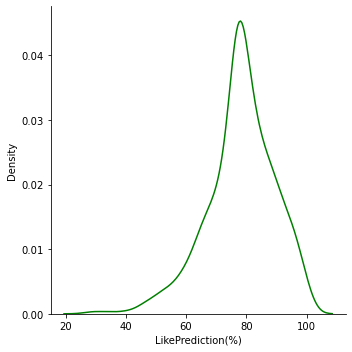

In [118]:
sns.displot(df["LikePrediction(%)"],kind='kde',color='green')    # this resembles left skewed

# 50 % data (500 movies) have LikePrediction(%) from 72.5% to 85% roughly

In [119]:
df["LikePrediction(%)"].describe()

count    1000.000000
mean       78.159350
std        11.284619
min        28.000000
25%        72.000000
50%        77.650000
75%        86.000000
max       100.000000
Name: LikePrediction(%), dtype: float64

In [120]:
px.box(df["LikePrediction(%)"])  # as the density function graph is somewhat left skewed the outliers will be below the fence

###### observation : The Distribution of the Votes is left skewed with normal distribution

with 50% data (500 movies) having LikePrediction(%) from 72% to 86% 

as the data is left skewed, there will be presence of outliers below the lower fence

---

> 5. Gross(millionsUS$) Univariate Analysis

In [121]:
px.histogram(df["Gross(millionsUS$)"])

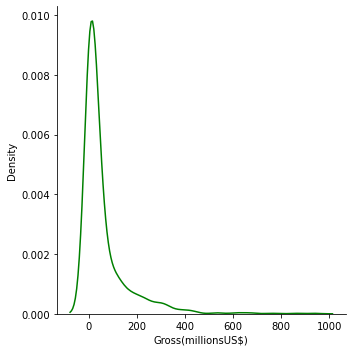

In [122]:
sns.displot(df["Gross(millionsUS$)"],kind='kde',color='green')

# The distribution is right skewed (mean>median) so it has outliers present above the upper value

In [123]:
df["Gross(millionsUS$)"].describe()

count    1000.000000
mean       59.762070
std       101.704803
min         0.000000
25%         3.875000
50%        23.585000
75%        61.537500
max       936.660000
Name: Gross(millionsUS$), dtype: float64

In [124]:
px.box(df["Gross(millionsUS$)"])

# The distribution is right skewed (mean>median) so it has outliers present above the upper value

### observation : The Distribution of the Gross(millionsUS$) is right skewed (+vely skewed) as mean > median
with 50% data (500 movies) having votes from 3.875 to 61.575

as the data is right skewed, there will be presence of outliers above the upper fence

(evident that only a few number of movies gain a lot of profits)

---

In [125]:
# Top 3 Rated movies
df.sort_values(['Ratings'],ascending=False).head(3)

Name  Year             Directors #directors #genres  \
1    The Shawshank Redemption  1994        Frank Darabont          1       1   
6               The Godfather  1972  Francis Ford Coppola          1       2   
180           Soorarai Pottru  2020         Sudha Kongara          1       1   

     DecadeofRelease Certified  Duration(min)  Ratings    Votes  \
1               1990         A            142      9.3  2409586   
6               1970         A            175      9.2  1667300   
180             2020         U            153      9.1    83443   

     LikePrediction(%)  Gross(millionsUS$)  
1                80.00              28.340  
6               100.00             134.970  
180              77.26              35.475

---
## Bivariate Analysis

#### Categorical to Numerical Plots:

###### 1. Relation b/w DecadeofRelease and Gross(millionsUS$)

In [126]:
df.pivot_table(index = "DecadeofRelease", values = ["Gross(millionsUS$)"],aggfunc = ["sum"])

sum
                Gross(millionsUS$)
DecadeofRelease                   
1920                        17.775
1930                       275.220
1940                       221.950
1950                       659.980
1960                      1923.170
1970                      3525.795
1980                      5136.720
1990                      8992.700
2000                     15520.510
2010                     23098.025
2020                       390.225

<AxesSubplot:xlabel='DecadeofRelease', ylabel='Gross(millionsUS$)'>

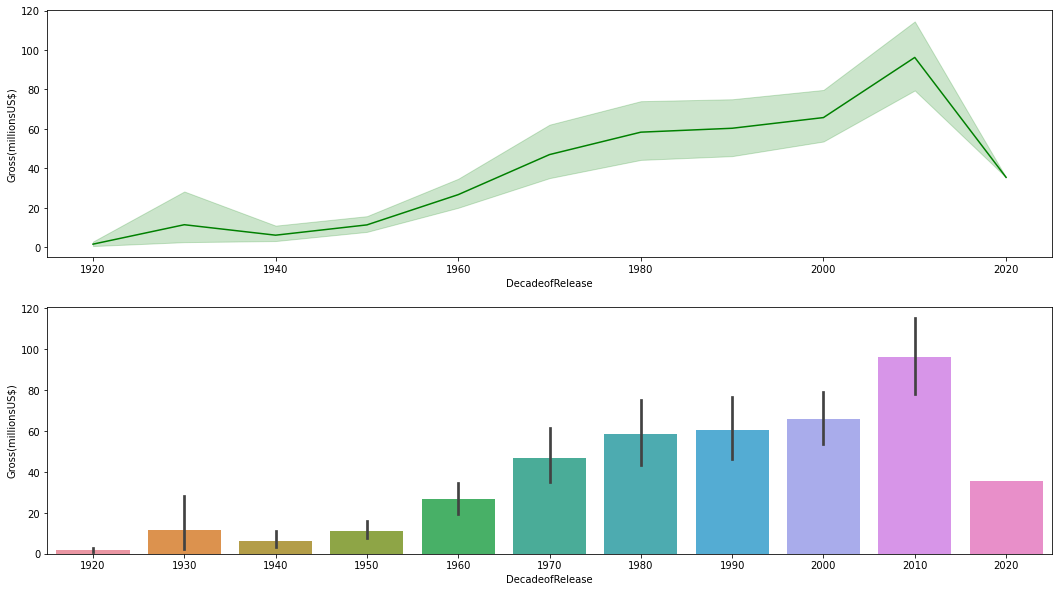

In [127]:
fig, axes = plt.subplots(2,figsize=(18,10))
sns.lineplot(x='DecadeofRelease',y='Gross(millionsUS$)',data=df,ax=axes[0],color='green')
sns.barplot(x='DecadeofRelease',y='Gross(millionsUS$)',data=df,ax=axes[1])

# This also shows as years passes by the Gross(millionsUS$) rises

###### Observation: The 2020 is the present decade with one year passed and that to with covid so it depicts less number of box office collections
---

###### 2. Relation b/w DecadeofRelease and Votes

In [128]:
df.pivot_table(index = "DecadeofRelease", values = ["Votes"],aggfunc = ["median","mean"])

median           mean
                    Votes          Votes
DecadeofRelease                         
1920              58710.0   76600.636364
1930              54742.5   91530.750000
1940              59636.0  103879.500000
1950              74953.0  118048.775862
1960              71444.0  126266.263889
1970              98816.0  214439.666667
1980             169554.5  265753.545455
1990             176383.0  366325.369128
2000             234793.0  353445.788136
2010             215234.0  327541.045833
2020              72241.0  106870.909091

<AxesSubplot:xlabel='DecadeofRelease', ylabel='Votes'>

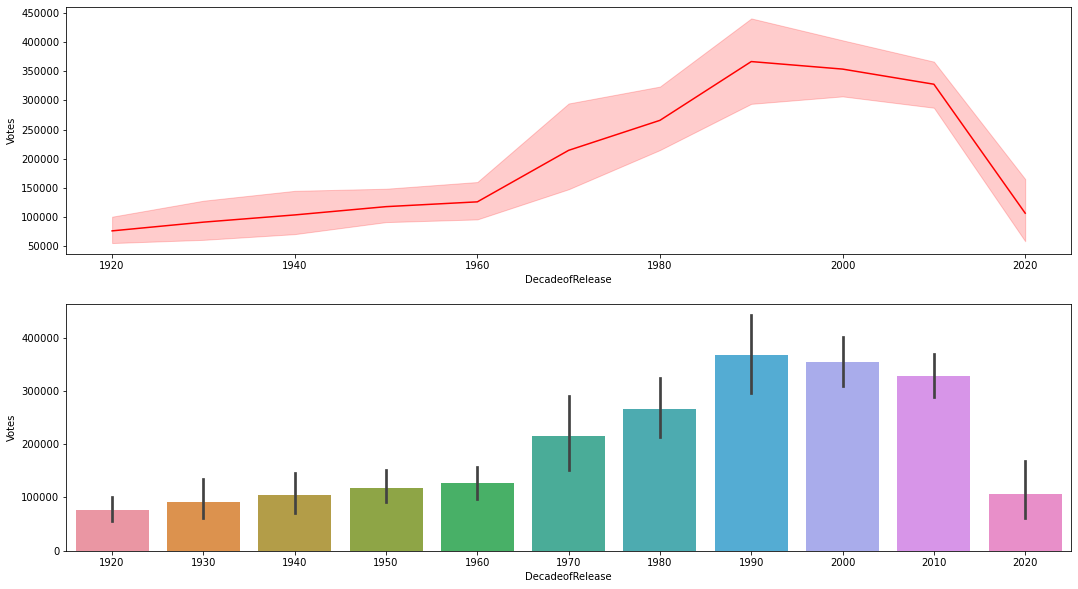

In [129]:
fig, axes = plt.subplots(2,figsize=(18,10))
sns.lineplot(x='DecadeofRelease',y='Votes',data=df,ax=axes[0],color='red')
sns.barplot(x='DecadeofRelease',y='Votes',data=df,ax=axes[1])

# This also shows as years passes by the Gross(millionsUS$) rises

###### Observation: The no. of votes have increased siginificantly at the end of the 20 th century (1990 decade) but later it declines till the 2020s
---

###### 3. Relation b/w #directors and Gross(millionsUS$)

In [130]:
df.pivot_table(index=['#directors'],values=['Gross(millionsUS$)'],aggfunc=['median','mean'])

# This shows how the no. of directors is effecting on the duration(min) and Gross obtained

median               mean
           Gross(millionsUS$) Gross(millionsUS$)
#directors                                      
1                      22.905          54.913606
2                      33.015         114.059687
3                     194.460         182.366875
4                     124.880         124.880000
5                      39.100          39.100000
6                       3.850           3.850000
12                     76.410          76.410000

<AxesSubplot:xlabel='#directors', ylabel='Gross(millionsUS$)'>

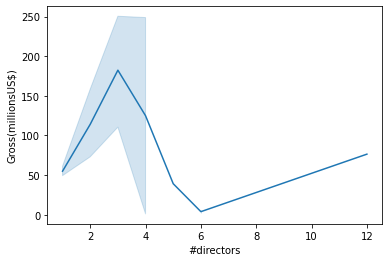

In [131]:
sns.lineplot(x='#directors',y='Gross(millionsUS$)',data=df)

######  Observation: This trend shows that atmost of having 3 directors resulted in achieving higher Gross 
###### Observation: The movies with 3 directors yield large box office colections that can be seen from the above plot

###### 4. Relation b/w #directors and Ratings

In [132]:
df.groupby("#directors")[["Ratings"]].agg(['mean'])

Ratings
                mean
#directors          
1           7.955748
2           7.959375
3           8.062500
4           7.750000
5           7.800000
6           7.900000
12          7.700000

###### Observation : The movie ratings are better if the number of directors directing the movie = 3

###### 5. Relation b/w Certified and Gross(millionsUS$)

In [133]:
df.pivot_table(index=['Certified'],values=['Gross(millionsUS$)'],aggfunc=['median','mean'])

median               mean
          Gross(millionsUS$) Gross(millionsUS$)
Certified                                      
A                     35.475          55.565255
PG                    11.710          32.526548
R                      4.360          15.937854
U                     25.010          67.936778
UA                    47.030         116.482868

<AxesSubplot:xlabel='Certified', ylabel='Gross(millionsUS$)'>

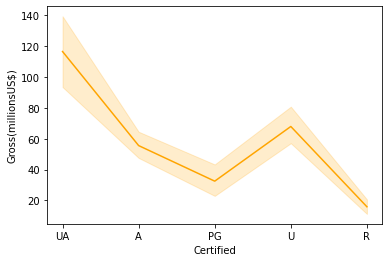

In [134]:
sns.lineplot(x='Certified',y='Gross(millionsUS$)',data=df,color='orange')

###### Observation : The UA certified movies are likely to achieve high Box-Office collections as it is evident that most people like to watch UA movies

###### 6. Relation b/w Certified and Votes

<AxesSubplot:xlabel='Certified', ylabel='Votes'>

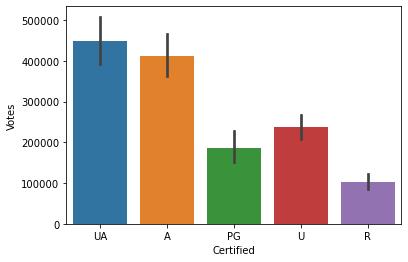

In [135]:
sns.barplot(x='Certified',y='Votes',data=df)

###### Observation : The UA certified movies are having higher votes as it is evident that most people like to watch UA movies
###### Observation : Surprisingly, The A certified movie has a large number of votes than U 
###### Observation : As expected, The R movies has got less number of votes

###### 7. Relation b/w #genres and Gross(millionsUS$)

<AxesSubplot:xlabel='#genres', ylabel='Gross(millionsUS$)'>

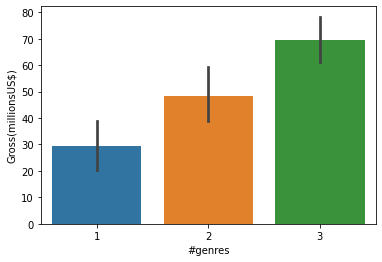

In [136]:
sns.barplot(x='#genres',y='Gross(millionsUS$)',data=df)

###### Observation : The movies with 3 genres are higly likely to achieve Gross(millionsUS$)

#### Numerical to Numerical Plots:

> Correlation Table

In [137]:
df.corr()

Year  DecadeofRelease  Duration(min)   Ratings  \
Year                1.000000         0.992563       0.172557 -0.127342   
DecadeofRelease     0.992563         1.000000       0.176751 -0.127562   
Duration(min)       0.172557         0.176751       1.000000  0.238853   
Ratings            -0.127342        -0.127562       0.238853  1.000000   
Votes               0.242361         0.243293       0.168557  0.478412   
LikePrediction(%)  -0.302536        -0.305661      -0.055308  0.250485   
Gross(millionsUS$)  0.255719         0.251211       0.143301  0.074096   

                       Votes  LikePrediction(%)  Gross(millionsUS$)  
Year                0.242361          -0.302536            0.255719  
DecadeofRelease     0.243293          -0.305661            0.251211  
Duration(min)       0.168557          -0.055308            0.143301  
Ratings             0.478412           0.250485            0.074096  
Votes               1.000000          -0.027126            0.591804  
LikePrediction(%)  -0.027126           1.000000           -0.059405  
Gross(millionsUS$)  0.591804          -0.059405            1.000000

> 2. Analysis of LikePredicition(%) and Gross(millionsUS$)

In [138]:
px.scatter(x=df['LikePrediction(%)'],y=df['Gross(millionsUS$)'],color=df['Certified'])


###### Observation: The movies with(70% to 90%)LikePrediction(%) and  R certificate having low Gross(millionsUS$)


###### Observation: The movies with(60% to 90%)LikePrediction(%) and UA certificate having high Gross(millionsUS$)

> 3. Analysis of Votes and Gross(millionsUS$)

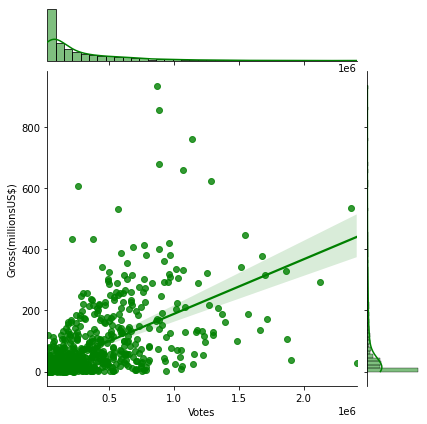

In [139]:
sns.jointplot(x=df['Votes'],y=df['Gross(millionsUS$)'],kind='reg',color='green')

###### Observation :  half the movies in the data have votes in the range 0 to 10 lakh votes also having collections in the range of 0-200 millions

> 4. Analysis of Duration(min) and LikePrediction(%)

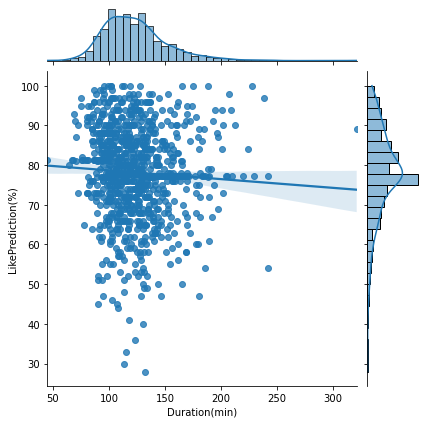

In [140]:
sns.jointplot(data = df,x = df["Duration(min)"],y = df["LikePrediction(%)"],kind='reg')

###### Observation :  half the movies in the data having Duration b/w 100 to 150 min also having LikePredictions in the range of 60-90 %

---
## Multivariate Analysis

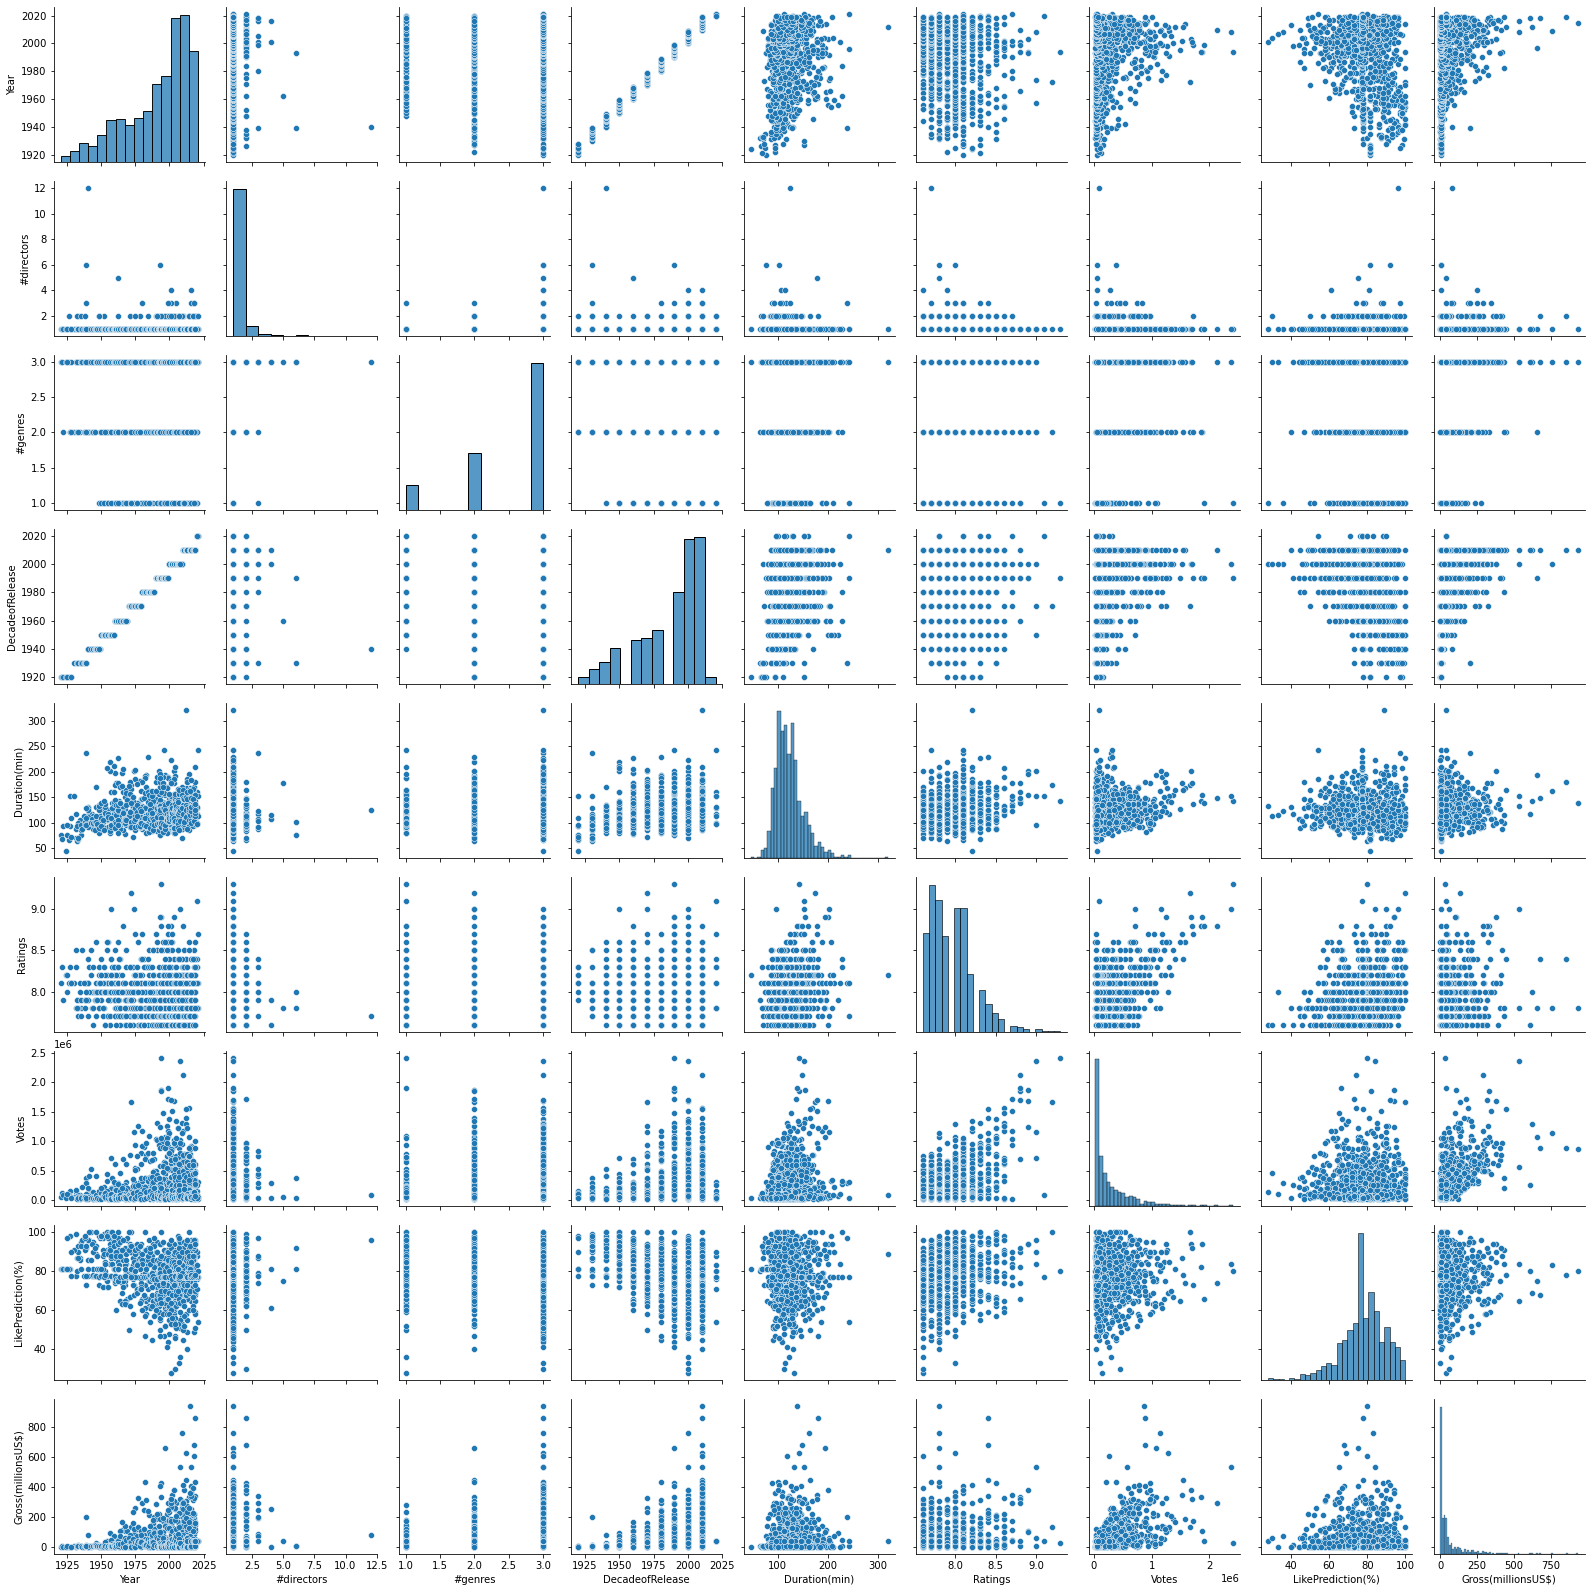

In [141]:
sns.pairplot(data = df,palette='husl')

###### Observation :  using pairplot we can find the variations with in all the features

> Analysis of the four variables : DecadeofRelease, #directors, Duration(min), LikePrediction(%)

In [142]:
df.groupby(['DecadeofRelease','#directors'])[['Duration(min)','LikePrediction(%)']].agg(['count','median'])

Duration(min)        LikePrediction(%)        
                                   count median             count  median
DecadeofRelease #directors                                               
1920            1                     10   85.0                10  81.180
                2                      1   67.0                 1  81.180
1930            1                     18   93.5                18  91.000
                2                      4   98.0                 4  88.500
                3                      1  238.0                 1  97.000
                6                      1  102.0                 1  92.000
1940            1                     33  104.0                33  86.000
                2                      2  134.0                 2  77.260
                12                     1  125.0                 1  96.000
1950            1                     57  112.0                57  87.000
                2                      1  103.0                 1  99.000
1960            1                     70  120.5                70  81.180
                2                      1   95.0                 1  81.180
                5                      1  178.0                 1  75.000
1970            1                     72  121.0                72  81.180
                2                      3   91.0                 3  90.000
1980            1                     86  118.0                86  77.455
                2                      1   99.0                 1  83.000
                3                      1   88.0                 1  78.000
1990            1                    134  121.5               134  77.000
                2                     13   99.0                13  73.000
                3                      1   92.0                 1  88.000
                6                      1   76.0                 1  81.180
2000            1                    216  122.0               216  77.260
                2                     17  107.0                17  80.000
                3                      2  108.0                 2  76.500
                4                      1  115.0                 1  61.000
2010            1                    217  127.0               217  77.260
                2                     19  102.0                19  74.000
                3                      3  108.0                 3  78.000
                4                      1  107.0                 1  81.000
2020            1                      9  130.0                 9  77.260
                2                      2  106.5                 2  81.500

###### Observation :  This is multivariate analysis of the movies(count,median) based on DecadeofRelease, #directors, Duration(min), LikePrediction(%)

> Analysis of three variables: Certified, Gross(millionUS$), #genres

<AxesSubplot:xlabel='Certified', ylabel='Gross(millionsUS$)'>

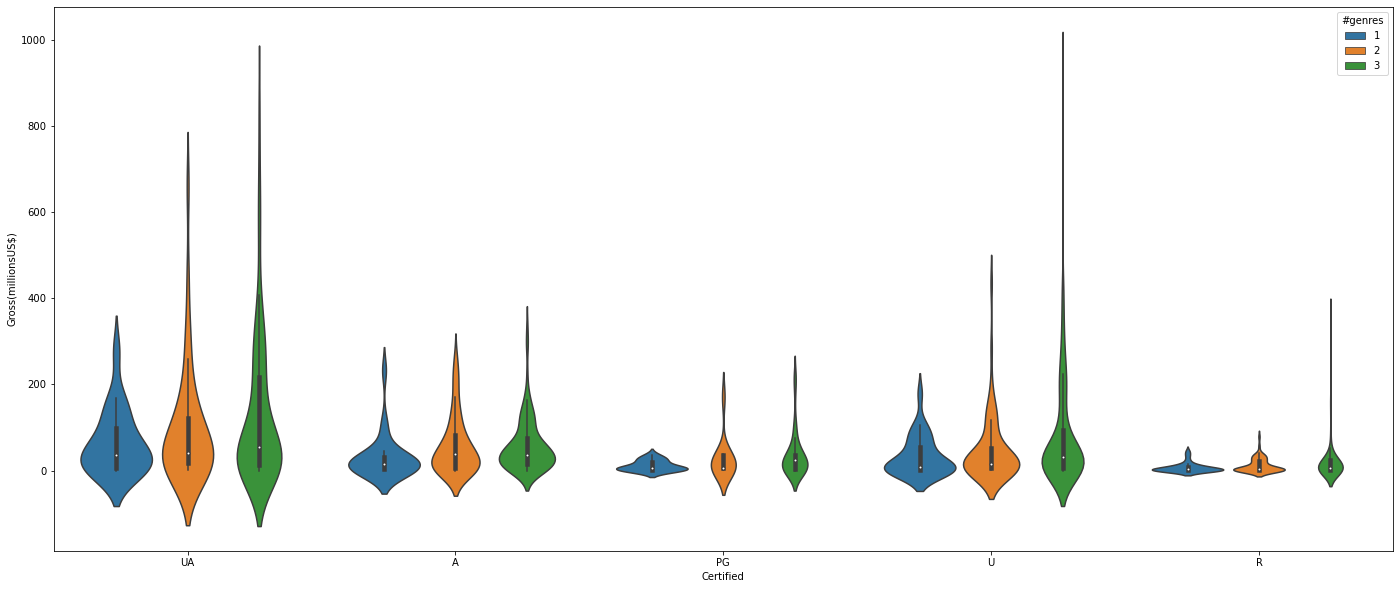

In [143]:
fig, axes = plt.subplots(1,1,figsize=(24,10))
sns.violinplot(x=df['Certified'],y=df['Gross(millionsUS$)'],hue=df['#genres'])

###### Observation :  This is the Violin Plot which shows the distribution  of the Gross(millionsUS$) based on the certifications
###### Observation: The larger the tails of the Distribution the more the data is skewed

> Analysis of Four variables : 'Certified','#genres', 'Votes','Gross(millionsUS$)'

In [144]:
df.pivot_table(index=['Certified','#genres'],values=['Votes','Gross(millionsUS$)'],aggfunc=['median','mean'])

median                         mean  \
                  Gross(millionsUS$)     Votes Gross(millionsUS$)   
Certified #genres                                                   
A         1                   16.360  131848.0          31.138750   
          2                   39.200  242903.0          58.210000   
          3                   36.950  288380.0          58.818101   
PG        1                    7.100   66677.0          11.695000   
          2                    6.365   98868.0          27.910417   
          3                   23.530  131222.0          37.191148   
R         1                    2.850   48232.0           7.190172   
          2                    3.505   46531.0          12.061985   
          3                    5.450   55927.0          19.947481   
U         1                    8.000   90579.5          33.618269   
          2                   16.220  121020.0          48.150079   
          3                   30.555  154205.0          78.905205   
UA        1                   35.475  148083.0          65.012632   
          2                   41.495  410752.5          97.756071   
          3                   54.580  363542.0         130.160853   

                                  
                           Votes  
Certified #genres                 
A         1        429263.333333  
          2        456905.888889  
          3        387315.186047  
PG        1         98291.090909  
          2        139449.833333  
          3        209446.557377  
R         1        104941.965517  
          2         78633.735294  
          3        114062.922481  
U         1        137483.769231  
          2        208467.507937  
          3        258827.246154  
UA        1        268485.894737  
          2        495620.833333  
          3        458793.348837

###### Observation :  This is multivariate analysis of the movies(mean,median) based on Certified, #genres, Votes, Gross(millionsUS$)

> Visualization Analysis of Three variables : '#genres', 'Votes','Gross(millionsUS$)'

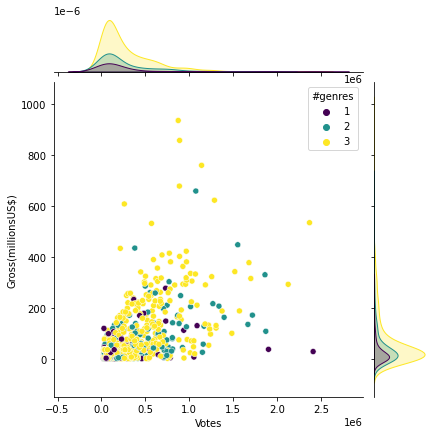

In [145]:
sns.jointplot(x=df['Votes'],y=df['Gross(millionsUS$)'],hue=df['#genres'],palette='viridis')

###### Observation :  This shows scatterplot and histogram of the movies Votes and Gross(millionsUS$), based on #genres

> Analysis of Four variables : '#directors','#genres', 'Votes','LikePrediction(%)'

In [146]:
df.pivot_table(index=['#directors','#genres'],values=['Votes','LikePrediction(%)'],aggfunc=['median','mean'])

median                        mean  \
                   LikePrediction(%)     Votes LikePrediction(%)   
#directors #genres                                                 
1          1                  78.500   83518.5         78.644259   
           2                  80.000  113598.0         79.962068   
           3                  77.650  167185.0         77.285737   
2          2                  78.325  247229.0         77.409000   
           3                  79.000  238518.5         77.814259   
3          1                  78.000  220046.0         78.000000   
           2                  74.000  743875.0         74.000000   
           3                  83.000  426641.0         84.441667   
4          3                  71.000  164789.5         71.000000   
5          3                  75.000   52941.0         75.000000   
6          3                  86.590  210259.0         86.590000   
12         3                  96.000   90338.0         96.000000   

                                   
                            Votes  
#directors #genres                 
1          1        211875.953704  
           2        272219.514768  
           3        286446.128250  
2          2        449519.100000  
           3        340426.462963  
3          1        220046.000000  
           2        743875.000000  
           3        425641.666667  
4          3        164789.500000  
5          3         52941.000000  
6          3        210259.000000  
12         3         90338.000000

###### Observation :  The above table shows that there are no movies with 1 or 2 number of genres with the directors more than 3

# Conclusion:

###### Most of the movies in the data have ratings 7.7, 7.8, 8, 8.1 . 

###### The movies with 3 number of directors yield good Gross (Box Office Collections)

###### Most of the Movies(50% data) have votes in the range 0 to 10 lakhs with gross 0 to 200 millions

###### The UA  certified films are earning more Gross. If we drill down more the UA movies with 3 directors yield more Gross than 1,2 no. of directors

###### The movies with(70% to 90%)LikePrediction(%) and  R certificate having low Gross(millionsUS$)

###### The movies with(60% to 90%)LikePrediction(%) and UA certificate having high Gross(millionsUS$)

###### As the Decade passes by, The Gross and the no. of movies released are increasing steeply 